In [5]:
import numpy as np
from matplotlib import pyplot as plt

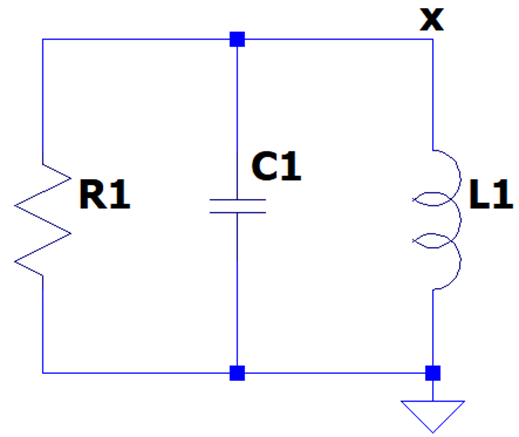

\begin{align}
i_R + i_C + i_L &= 0
\\
i_R &= \frac{V_x}{R}
\\
i_C &= C \frac{d V_x}{d t}
\\
L \frac{d i_L}{d t} &= V_x
\end{align}

Plug (2) into (1):

$$i_R = \frac{L}{R} \frac{d i_L}{d t}$$

Plug (3) into (1):
    
$$i_C = L C \frac{d^2 i_L}{d t^2}$$

Plug [5], [6] into (1),

$$\frac{L}{R} \frac{d i_L}{d t} + L C \frac{d^2 i_L}{d t^2} + i_L = 0$$

Re-arrange to fit it to a standard pattern:

$$L C \frac{d^2 i_L}{d t^2} + \frac{L}{R} \frac{d i_L}{d t} + i_L = 0$$

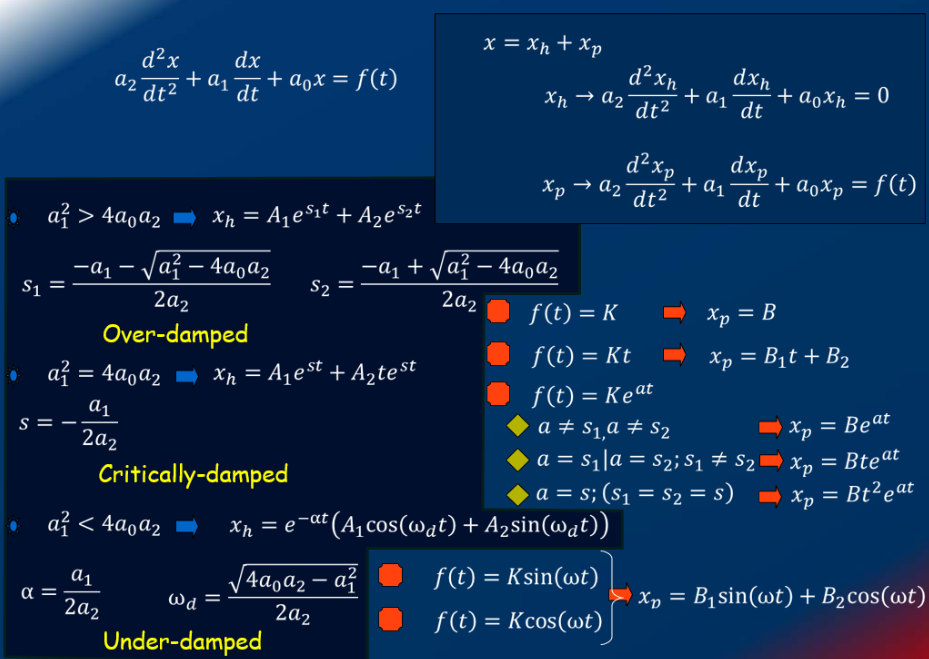

In [6]:
def x2K(t, a2, a1, a0, K, x0, dx0, tol=1e-20):
    """
    Homogeneous solution: constant force response f(t) = K
    
    x0: x(t=0)
    dx0: dx/dt (t=0)    
    """
    T1 = a1**2
    T2 = 4*a0*a2
    
    B = K/a0
    
    b = np.array([[x0 - B],
                  [dx0]])
    
    if T1 > T2:
        # Over-damped
        T3 = np.sqrt(T1 - T2)
        
        s1 = (-a1 - T3)/(2*a2)
        s2 = (-a1 + T3)/(2*a2)
    
        A = np.array([[1,   1],
                      [s1, s2]])
    
        AA = np.linalg.solve(A, b)
        A1 = AA[0,0]
        A2 = AA[1,0]
    
        xt = A1*np.exp(s1*t) + A2*np.exp(s2*t) + B
        dx = A1*s1*np.exp(s1*t) + A2*s2*np.exp(s2*t)
        
        xf_str = f"{A1}*exp({s1}*t) + {A2}*exp({s2}*t) + {B}"
        dxf_str = f"{A1}*{s1}*exp({s1}*t) + {A2}*{s2}*exp({s2}*t)"
        
        return {'mode': 'over-damped', 'x(t)': xt, 'dx(t)': dx, 
                'log': {'T1': T1, 'T2': T2,
                       'A1': A1, 'A2': A2,
                       's1': s1, 's2': s2},
                'xf': xf_str,
                'dxf': dxf_str}
        
#     elif T1 == T2:      
    elif (np.abs(T1 - T2) <= tol) :
#     and \
#          np.abs(np.log(T1) - np.log(T2)) < tol :
    
        # Critically-damped
        s = - a1/(2*a2)

        A = np.array([[1,  0],
                      [s,  1]])
    
        AA = np.linalg.solve(A, b)
        A1 = AA[0,0]
        A2 = AA[1,0]
                
        est = np.exp(s*t)
        xt = A1*est + A2*t*est + B
        dx = A1*s*est + A2*(s*t*est + est)
        
        xf_str = f"{A1}*exp({s}*t) + {A2}*t*exp({s}*t) + {B}"
        dxf_str = f"{A1}*{s}*exp({s}*t) + {A2}*({s}*t*exp({s}*t) + exp({s}*t))"
                
        return {'mode': 'critically-damped', 'x(t)': xt, 'dx(t)': dx, 
                'log': {'T1': T1, 'T2': T2,
                       'A1': A1, 'A2': A2,
                       's': s},
                'xf': xf_str,
                'dxf': dxf_str}
        
    else:
        # Under-damped
        alpha = a1/(2*a2)
        w = np.sqrt(T2 - T1)/(2*a2)
        
        A = np.array([[1,  0],
                      [-alpha,  w]])
    
        AA = np.linalg.solve(A, b)
        A1 = AA[0,0]
        A2 = AA[1,0]
        
        c = np.cos(w*t)
        s = np.sin(w*t)
        eat = np.exp(-alpha*t) 
        
        xt = eat * (A1 * c + A2 * s) + B
        dx = eat * (-w*A1*s + w*A2*c) -alpha*eat*(A1*c + A2*s)
        
        xf_str = f"exp(-{alpha}*t) * ({A1} * cos({w}*t) + {A2} * sin({w}*t)) + {B}"
        dxf_str = f"exp(-{alpha}*t) * (-{w}*{A1}*sin({w}*t) + {w}*{A2}*cos({w}*t)) -{alpha}*exp(-{alpha}*t)*({A1}*cos({w}*t) + {A2}*sin({w}*t))"
                
        return {'mode': 'under-damped', 'x(t)': xt, 'dx(t)': dx, 
                'log': {'T1': T1, 'T2': T2,
                       'A1': A1, 'A2': A2,
                       'alpha': alpha, 'wd': w},
                'xf': xf_str,
                'dxf': dxf_str}

Note

* Here, $x \equiv i_L$
* So, $\frac{dx}{dt} = \frac{d i_L}{d t} = \frac{V_x}{L}$
  * Therefore, $V_x = L \frac{d i_L}{d t} = L \frac{dx}{dt}$

\begin{align}
i_s + i_R + i_C + i_L &= 0
\\
L C \frac{d^2 i_L}{d t^2} + \frac{L}{R} \frac{d i_L}{d t} + i_L &= -i_s
\end{align}

$K = -i_s$

Source transformation

$V_s = 30 V$ $\Rightarrow$ $i_s = 30/100 =$ 300 mA.

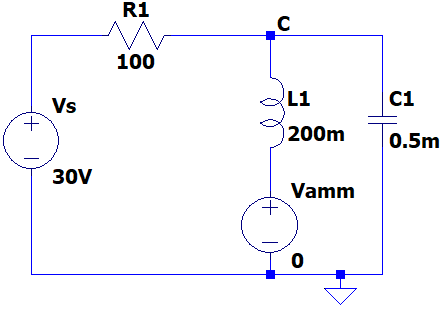

Vx(0.3) = -2.7405e-01 V. Vx(ss) = 3.554450428281632e-130 V.
mode = under-damped
Vx(t) = 0.2 * (exp(-10.0*t) * (-99.49874371066198*-0.2999600000000001*sin(99.49874371066198*t) + 99.49874371066198*0.2211123395082877*cos(99.49874371066198*t)) -10.0*exp(-10.0*t)*(-0.2999600000000001*cos(99.49874371066198*t) + 0.2211123395082877*sin(99.49874371066198*t)))
Vx(0.0)= 5.00000 V. Vx(0.1)= -2.61084 V. Vx(0.2)= 0.98547 V. Vx(0.3)= -0.27405 V. 

(-6.0, 7.0)

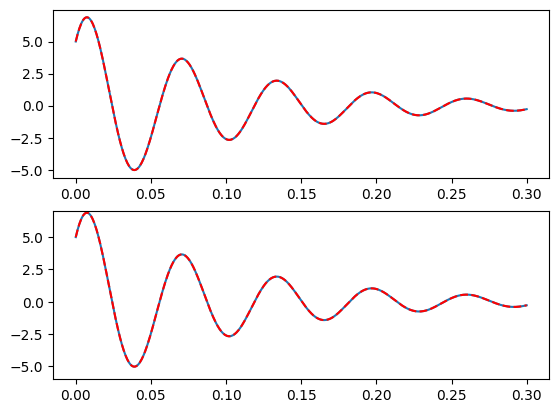

In [80]:
Is = -300e-3   # Caution!!!
               # iS, iR, iL, iC are positive: flowing downward!
               # because iS + iR + iL + iC = 0 (they all are flowing downward.)
               # flowing upward = negative!!!

L = 200e-3
C = 0.5e-3
R = 100 # 1, 10, 100 # over, critical, under 
K = -Is

iL0 = 0.04e-3
Vx0 = 5

a2 = L*C
a1 = L/R
a0 = 1

ft = 0

t = 300e-3
res = x2K(t, a2, a1, a0, K, x0=iL0, dx0=Vx0/L)
Vx = L*res['dx(t)']

res = x2K(100*t, a2, a1, a0, K, x0=iL0, dx0=Vx0/L)
Vxss = L*res['dx(t)']

print(f"Vx({t}) = {Vx:.4e} V. Vx(ss) = {Vxss} V.")
print("mode =", res['mode'])    
print(f'Vx(t) = {L} * (' + res['dxf'] + ')')    
    
ts = [0, 100e-3, 200e-3, 300e-3]

for i in range(len(ts)):

    res = x2K(ts[i], a2, a1, a0, K, x0=iL0, dx0=Vx0/L)

    Vx = L*res['dx(t)']
    print(f"Vx({ts[i]:.1f})= {Vx:.5f} V", end='. ')
    
    
ts = np.linspace(0, t, 500)
res = x2K(ts, a2, a1, a0, K, x0=iL0, dx0=Vx0/L)
Vx = L*res['dx(t)']

sin = np.sin
cos = np.cos

x = eval(f'lambda t: {L} * (' + res['dxf'] + ')')

plt.subplot(2,1,1)
plt.plot(ts, Vx)
plt.plot(ts, x(ts), 'r--')

plt.subplot(2,1,2)
plt.plot(ts, Vx)
plt.plot(ts, x(ts), 'r--')
plt.ylim((-6, 7))



# Harmonic oscillator

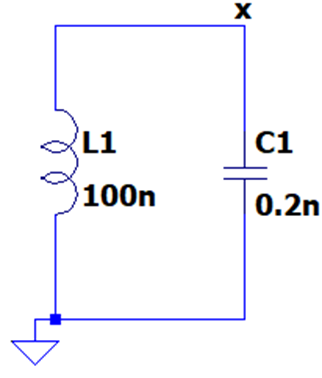

\begin{align}
i_s + 0 + i_C + i_L &= 0
\\
L C \frac{d^2 i_L}{d t^2} + 0 \frac{d i_L}{d t} + i_L &= -i_s
\end{align}

Vx(1e-07) = 2.4229e-02 V. Vx(ss) = 0.0455286188834664 V.
mode = under-damped
Vx(t) = 1e-07 * (exp(-0.0*t) * (-223606797.749979*0.003*sin(223606797.749979*t) + 223606797.749979*0.0*cos(223606797.749979*t)) -0.0*exp(-0.0*t)*(0.003*cos(223606797.749979*t) + 0.0*sin(223606797.749979*t)))
Vx(0 ns)= 0.00000 V. Vx(10 ns)= -0.05278 V. Vx(20 ns)= 0.06516 V. Vx(30 ns)= -0.02766 V. 

NameError: name 'exp' is not defined

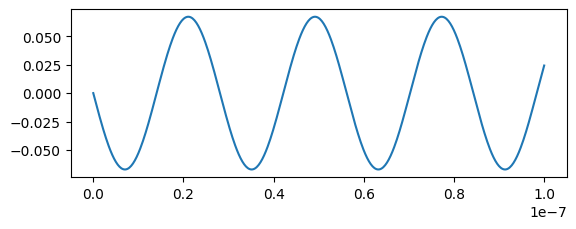

In [7]:
Is = 0   # Caution!!!
               # iS, iR, iL, iC are positive: flowing downward!
               # because iS + iR + iL + iC = 0 (they all are flowing downward.)
               # flowing upward = negative!!!

L = 100e-9
C = 0.2e-9
K = -Is

iL0 = 3e-3
Vx0 = 0

a2 = L*C
a1 = 0
a0 = 1

ft = 0

t = 100e-9
res = x2K(t, a2, a1, a0, K, x0=iL0, dx0=Vx0/L)
Vx = L*res['dx(t)']

res = x2K(100*t, a2, a1, a0, K, x0=iL0, dx0=Vx0/L)
Vxss = L*res['dx(t)']

print(f"Vx({t}) = {Vx:.4e} V. Vx(ss) = {Vxss} V.")
print("mode =", res['mode'])    
print(f'Vx(t) = {L} * (' + res['dxf'] + ')')    
    
ts = [0, 10e-9, 20e-9, 30e-9]

for i in range(len(ts)):

    res = x2K(ts[i], a2, a1, a0, K, x0=iL0, dx0=Vx0/L)

    Vx = L*res['dx(t)']
    print(f"Vx({ts[i]*1e9:.0f} ns)= {Vx:.5f} V", end='. ')
    
    
ts = np.linspace(0, t, 500)
res = x2K(ts, a2, a1, a0, K, x0=iL0, dx0=Vx0/L)
Vx = L*res['dx(t)']

sin = np.sin
cos = np.cos

x = eval(f'lambda t: {L} * (' + res['dxf'] + ')')

plt.subplot(2,1,1)
plt.plot(ts, Vx)
plt.plot(ts, x(ts), 'r--')

plt.subplot(2,1,2)
plt.plot(ts, Vx)
plt.plot(ts, x(ts), 'r--')
plt.ylim((-70e-3, 70e-3))



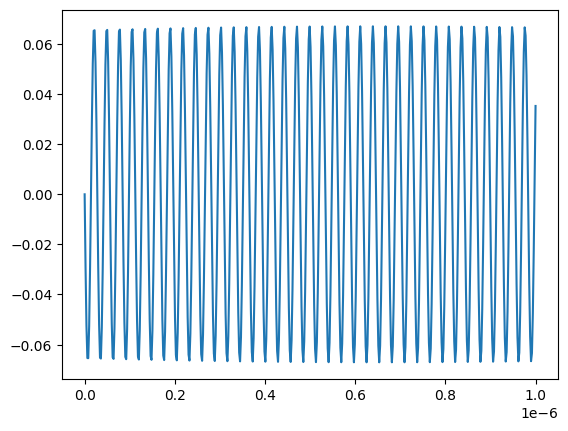

In [8]:
t = 1e-6
ts = np.linspace(0, t, 500)
res = x2K(ts, a2, a1, a0, K, x0=iL0, dx0=Vx0/L)
Vx = L*res['dx(t)']
plt.plot(ts, Vx)




$\omega = \frac{1}{\sqrt{LC}}$

In [9]:
f = 1/(2*np.pi* np.sqrt(L*C))
f

35588127.17085885

In [10]:
1/f

2.8099258924162906e-08

Period ~ 28 ns